Question 1: Application of Differentiation in AI Model Optimization

In [1]:
from sympy import *
x, y = symbols('x y')
L = Function('L')
f = exp(x**2 + y**2)+cos(x*y)
Eq(L(x,y),f)

Eq(L(x, y), exp(x**2 + y**2) + cos(x*y))

Part a

In [2]:
px = diff(f, x)  # partial derivative with respect to x
px

2*x*exp(x**2 + y**2) - y*sin(x*y)

In [3]:
py = diff(f, y)  # partial derivative with respect to y
py

-x*sin(x*y) + 2*y*exp(x**2 + y**2)

Part b

In [4]:
def gradient(x1, y1):
    coordinates = [(x, x1), (y, y1)]
    return [px.subs(coordinates), py.subs(coordinates)]

In [5]:
gradient(1,2)

[-2*sin(2) + 2*exp(5), -sin(2) + 4*exp(5)]

Part c

In [6]:
import matplotlib.pyplot as plt
import numpy as np

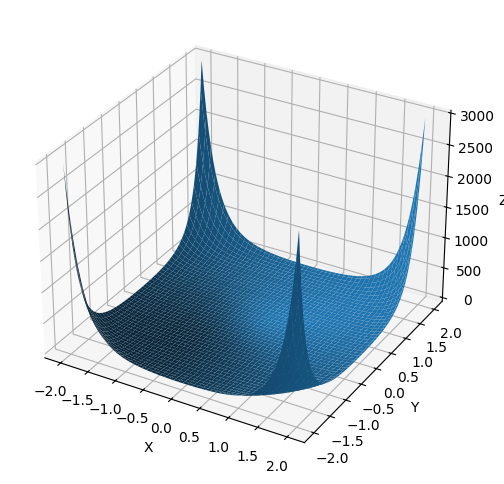

In [7]:
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = lambdify((x, y), f, "numpy")

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z(X, Y), edgecolor='none')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

Part d

Gradient descent is an optimization method where the loss function of a model is minimized by repeatedly adjusting the model parameters.

To minimize the loss function by updating model parameters, the gradient vector is used.

Question 2: Integration for Signal Processing

In [8]:
t = symbols('t')
A = Function('A')
g = 2*t**2*exp(-t)
Eq(A(t), g)

Eq(A(t), 2*t**2*exp(-t))

Part a

In [9]:
integrate(g, (t,0,4))

4 - 52*exp(-4)

Part b

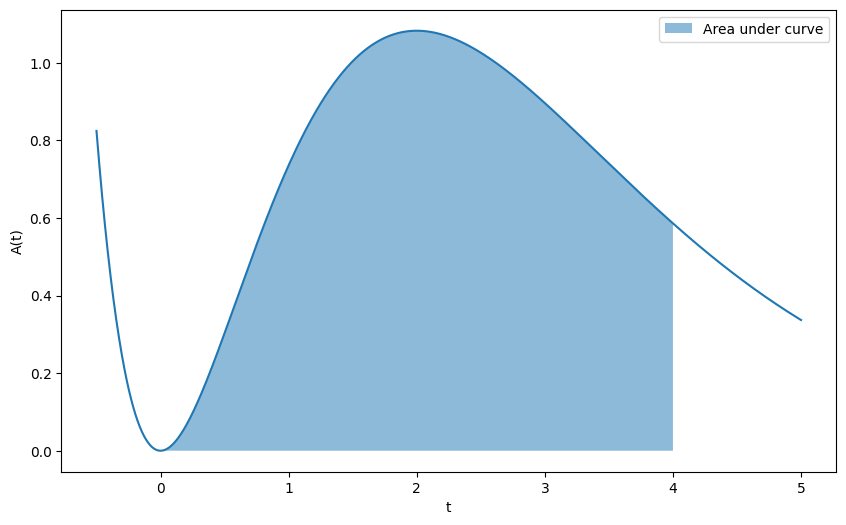

In [10]:
t_vals = np.linspace(-0.5, 5, 1000)
G = lambdify(t, g, "numpy")
plt.figure(figsize=(10, 6))
plt.plot(t_vals, G(t_vals))
plt.xlabel("t")
plt.ylabel("A(t)")

x_fill = np.linspace(0, 4, 1000)
A_fill = G(x_fill)
plt.fill_between(x_fill, A_fill, alpha=0.5, label="Area under curve")
plt.legend()
plt.show()

Part c

The integral of the signal gives the area under the curve of the signal. This value represents the size or strength of the signal. 

In practical cases the area under the curve may be negative, therefore the signal energy is taken as the area under the squared function.

Question 3: Series Convergence and Numerical Approximation

Part a

In [11]:
f = Function('f')
h = ln(1+x)
Eq(f(x), h)

Eq(f(x), log(x + 1))

In [12]:
s = h.series(x, 0, 11).removeO()
s

-x**10/10 + x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x

In [13]:
# with sympy
def get_approximation(x_val):
    if x_val > -1 and x_val <= 1:
        return s.subs(x,x_val).evalf()
    else:
        return "out of range"

In [14]:
get_approximation(0)

0

In [15]:
# with python
def ln_approximation(x_val):
    if x_val > -1 and x_val <= 1:
        result = 0
        for n in range(1, 11):
            term = ((-1) ** (n + 1)) * (x_val ** n) / n
            result += term

        return result
    else:
        return "out of range"

In [16]:
ln_approximation(0)

0.0

Part b

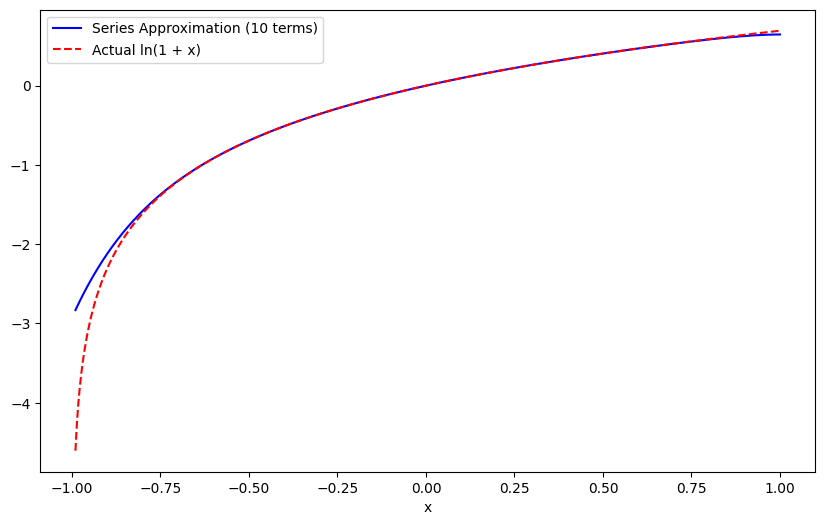

In [17]:
x_vals = np.linspace(-0.99, 1.00, 1000)
y_approxs = np.array([ln_approximation(a) for a in x_vals])
y_true = np.array([h.subs(x, b) for b in x_vals])

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_approxs, label="Series Approximation (10 terms)", color="blue")
plt.plot(x_vals, y_true, label="Actual ln(1 + x)", color="red", linestyle="--")

# Customize the plot
plt.xlabel("x")
# plt.axhline(0, color='black', linewidth=0.8)
# plt.axvline(0, color='black', linewidth=0.8)
plt.legend()

plt.show()

Part c

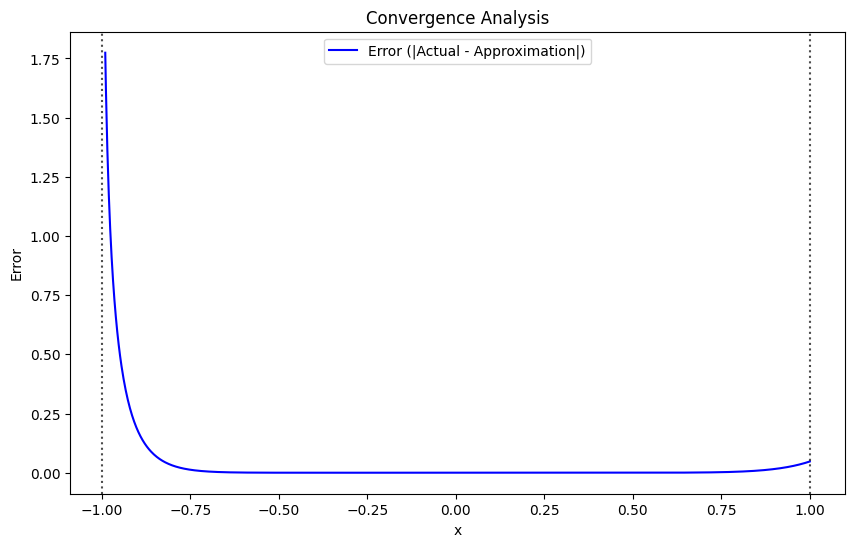

In [18]:
# absolute error
error = np.abs(y_true - y_approxs)

# Plot the error
plt.figure(figsize=(10, 6))
plt.plot(x_vals, error, label="Error (|Actual - Approximation|)", color="blue")
plt.axvline(1, color="black", linestyle=":", alpha=0.7)  # Vertical line at 1
plt.axvline(-1, color="black", linestyle=":", alpha=0.7)  # Vertical line at -1
plt.title("Convergence Analysis")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
# plt.grid()
plt.show()


- The series diverges as x approaches -1 because the ln(1+x) approaches negative infinity. ln(0) is undefined.
- The series converges quickly for x values close to 0.
- The series converges slowly as x approaches 1, so as x approaches the upper boundary, it converges slower.

 Question 4: Fourier Transform for Data Filtering

In [19]:
s = Function('s')
t = Symbol('t')
expr = sin(2*pi*t) + 0.5*sin(10*pi*t) + 0.3*sin(50*pi*t)
Eq(s(t), expr)

Eq(s(t), sin(2*pi*t) + 0.5*sin(10*pi*t) + 0.3*sin(50*pi*t))

Part a

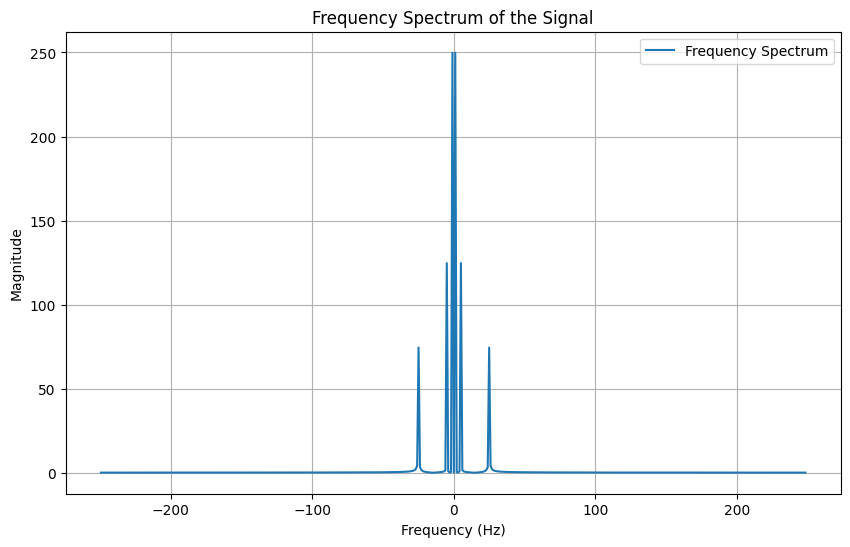

In [20]:
t_vals = np.linspace(0, 1, 500)
s_func = lambdify(t, expr, "numpy")
signal = s_func(t_vals)

ft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t_vals), d=(t_vals[1] - t_vals[0]))

plt.figure(figsize=(10, 6))
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(np.abs(ft_result)), label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of the Signal")
plt.grid()
plt.legend()
plt.show()

Getting the positive side only for clearer visualization.

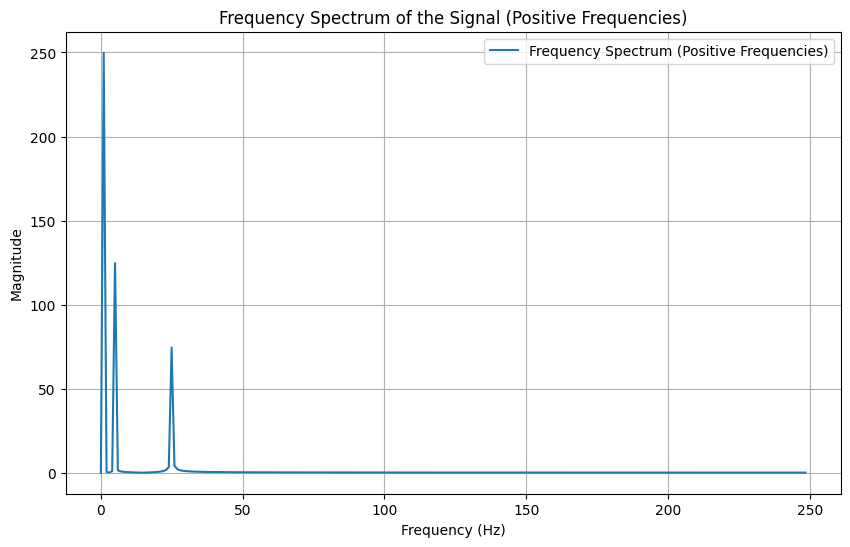

In [21]:
positive_indices = frequencies >= 0  # Boolean mask for positive frequencies
frequencies_p = frequencies[positive_indices]
fft_result_p = ft_result[positive_indices]

# Plot the frequency spectrum (positive side only)
plt.figure(figsize=(10, 6))
plt.plot(frequencies_p, np.abs(fft_result_p), label="Frequency Spectrum (Positive Frequencies)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of the Signal (Positive Frequencies)")
plt.grid()
plt.legend()
plt.show()

In [22]:
magnitude = np.abs(ft_result)
peak_indices = np.where(magnitude > np.max(magnitude) * 0.1)[0]  # Threshold for significant peaks

# Extract corresponding frequencies
peak_frequencies = frequencies[peak_indices]

print("Frequencies with peaks:", peak_frequencies)

Frequencies with peaks: [  0.998   4.99   24.95  -24.95   -4.99   -0.998]


Part b

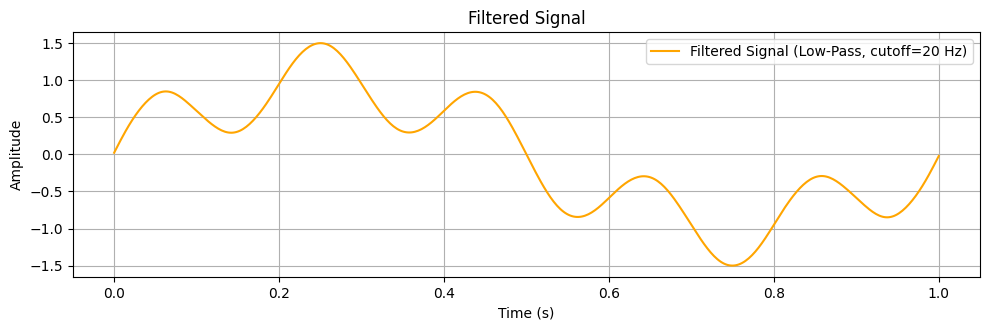

In [23]:
# frequencies above 20 Hz set to 0
filter = np.abs(frequencies) <= 20  # Boolean mask for low-pass filter

# Apply the filter
filtered_ft_result = ft_result * filter
# Reconstruct the filtered signal using Inverse FT
filtered_signal = np.fft.ifft(filtered_ft_result).real 

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))

# Original Signal
# plt.subplot(2, 1, 1)
# plt.plot(t_vals, signal, label="Original Signal")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.title("Original Signal")
# plt.grid()
# plt.legend()

# Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(t_vals, filtered_signal, label="Filtered Signal (Low-Pass, cutoff=20 Hz)", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Filtered Signal")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Part c

Frequency content of a signal can be modified by filtering the signal. Unwanted frequencies can be removed from the signal, useful frequencies can be emphasized and fluctuations in the signal can be smoothed out.

Signal filtering is used in telecommunications, audio processing, image processing, biomedical enginnering, etc.

 - Biomedical engineering: enhance the quality of signals recorded from humans (ECG, EMG).
  - Image processing: remove noise and artifacts from images.
  - Commmunication systems: remove noise from transmitted signals.

Question 5: Image Processing Using Fourier and Discrete Cosine Transforms

Part a

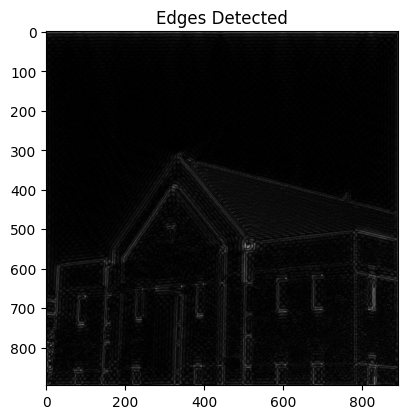

In [24]:
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

# Load the image
image = io.imread('Image.png') 

if image.shape[-1] == 4:  # RGBA image
    image = image[..., :3]  # Keep only the first 3 channels (RGB)

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Compute the 2D Fourier Transform
fft_image = fft2(gray_image)
fft_shifted = fftshift(fft_image)  

# High-pass filter
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2 
radius = 50 
mask = np.ones((rows, cols), dtype=np.float32)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol) ** 2 + (y - crow) ** 2 <= radius ** 2
mask[mask_area] = 0  

# Apply the high-pass filter
filtered_fft = fft_shifted * mask

# Inverse Fourier Transform to get edges
filtered_fft_shifted_back = ifftshift(filtered_fft)
edges = np.abs(ifft2(filtered_fft_shifted_back))


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title("Edges Detected")
plt.imshow(edges, cmap='gray')

# plt.subplot(1, 2, 2)
# plt.title("Original Image")
# plt.imshow(gray_image, cmap='gray')

plt.show()


Part b

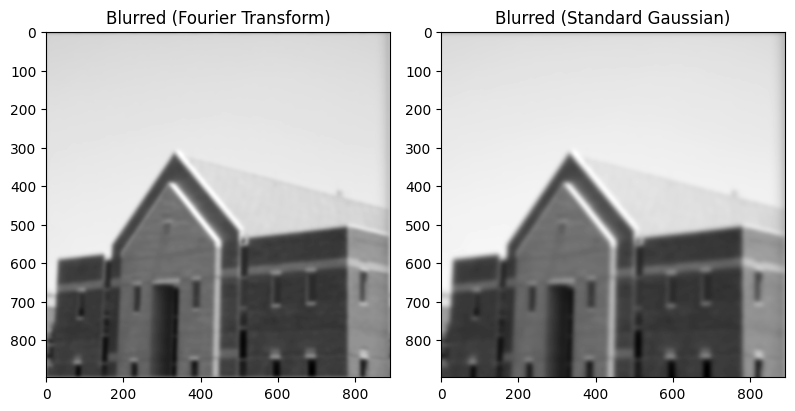

In [25]:
from scipy.ndimage import gaussian_filter
# Step 3: Create a Gaussian low-pass filter
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates
sigma = 30  # Standard deviation for the Gaussian kernel

# Generate the Gaussian kernel in the frequency domain
y, x = np.ogrid[:rows, :cols]
gaussian_filter_freq = np.exp(-((x - ccol)**2 + (y - crow)**2) / (2 * sigma**2))

# Step 4: Apply the Gaussian filter in the frequency domain
filtered_fft = fft_shifted * gaussian_filter_freq

# Step 5: Inverse Fourier Transform to get the blurred image
filtered_fft_shifted_back = ifftshift(filtered_fft)
blurred_image_fft = np.abs(ifft2(filtered_fft_shifted_back))

# Step 6: Standard Gaussian Blur
blurred_image_std = gaussian_filter(gray_image, sigma=6)  

# Step 7: Visualization
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Blurred (Fourier Transform)")
plt.imshow(blurred_image_fft, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Blurred (Standard Gaussian)")
plt.imshow(blurred_image_std, cmap='gray')

# plt.subplot(1, 3, 3)
# plt.title("Original Image")
# plt.imshow(gray_image, cmap='gray')


plt.tight_layout()
plt.show()


For the fourier transform the sigma value (standard deviation) used was 30. However for the standard guassian blur, the sigma value used was 6.

In [26]:
from skimage.metrics import mean_squared_error
mse_value = mean_squared_error(blurred_image_std, blurred_image_fft)

print(f"Mean Squared Error (MSE) between Fourier-based and Standard Gaussian blur: {mse_value}")

Mean Squared Error (MSE) between Fourier-based and Standard Gaussian blur: 0.00022154509056208384


Part c

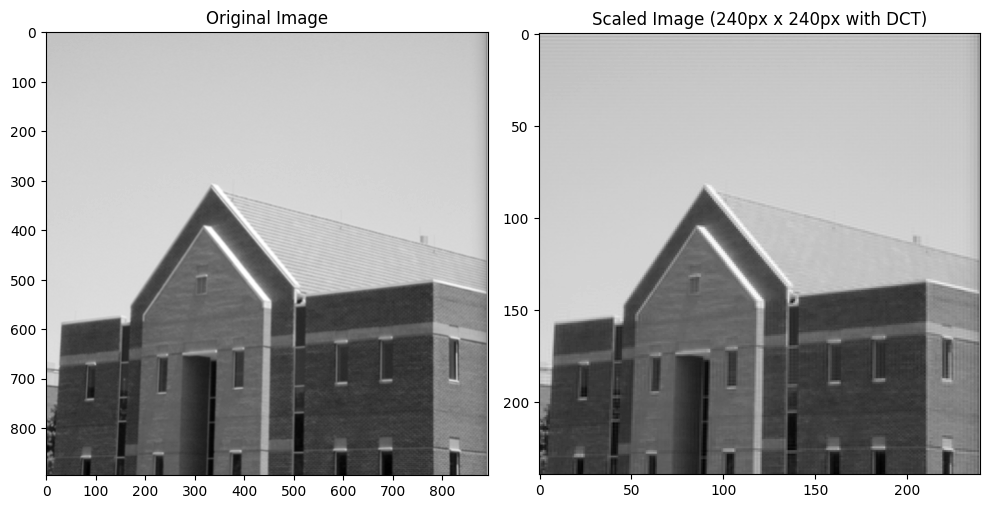

In [36]:
from scipy.fftpack import dct, idct
dct_image = dct(dct(gray_image.T, norm='ortho').T, norm='ortho')

height, width = gray_image.shape
scaled_dct_image = np.copy(dct_image)

resized_dct_image = scaled_dct_image[:240, :240]
idct_image = idct(idct(resized_dct_image.T, norm='ortho').T, norm='ortho')

plt.figure(figsize=(10, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')

# Display the scaled image
plt.subplot(1, 2, 2)
plt.title("Scaled Image (240px x 240px with DCT)")
plt.imshow(idct_image, cmap='gray')

plt.tight_layout()
plt.show()

The scaled down image looks good and has moderate quality. When directly comparing the two side by side, the lack of details in the compressed image can be seen. However after converting the image from size (896, 892) to (240, 240), the image still retains most of the details.

Part d

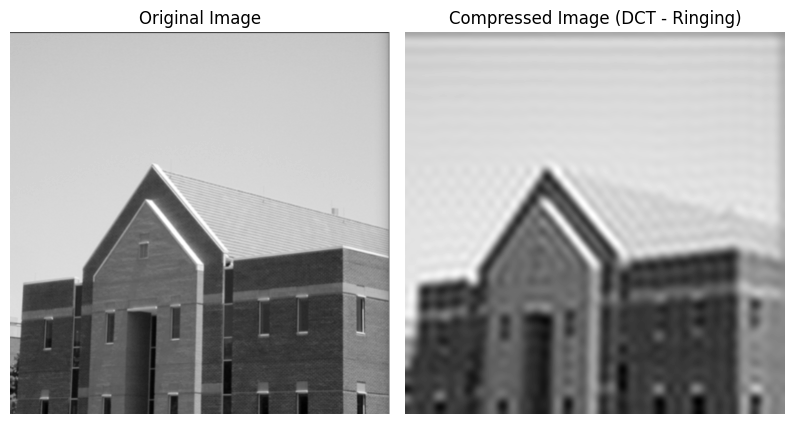

In [77]:
dct_image = dct(dct(gray_image.T, norm='ortho').T, norm='ortho')

compression_level = 50  
dct_image_compressed = np.copy(dct_image)

dct_image_compressed[compression_level:, :] = 0
dct_image_compressed[:, compression_level:] = 0

idct_image_compressed = idct(idct(dct_image_compressed.T, norm='ortho').T, norm='ortho')

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")

# Compressed image with DCT artifacts
plt.subplot(1, 3, 2)
plt.title("Compressed Image (DCT - Ringing)")
plt.imshow(idct_image_compressed, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


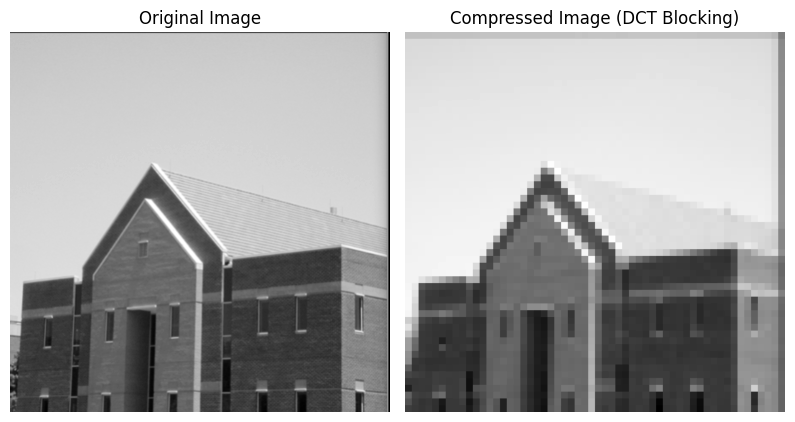

In [89]:
height, width = gray_image.shape
padded_width = (width // 16 + 1) * 16
padded_image = np.pad(gray_image, ((0, 0), (0, padded_width - width)), mode='constant')

# DCT compression parameters
compression_level = 1
height, width = padded_image.shape
dct_blocks = np.zeros_like(padded_image)

# Perform block-wise DCT
for i in range(0, height, 16):
    for j in range(0, width, 16):
        block = padded_image[i:i+16, j:j+16]
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        dct_block[compression_level:, :] = 0
        dct_block[:, compression_level:] = 0
        dct_blocks[i:i+16, j:j+16] = dct_block

# Perform block-wise IDCT
idct_image_compressed = np.zeros_like(padded_image)
for i in range(0, height, 16):
    for j in range(0, width, 16):
        block = dct_blocks[i:i+16, j:j+16]
        idct_block = idct(idct(block.T, norm='ortho').T, norm='ortho')
        idct_image_compressed[i:i+16, j:j+16] = idct_block

# Clip and display the images
idct_image_compressed = np.clip(idct_image_compressed, 0, 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(padded_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Compressed Image (DCT Blocking)")
plt.imshow(idct_image_compressed, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

Common Artifacts
 - Ringing: As DCT discards high frequency details from the image, ringing causes oscillations or ripples around edges or transitions in the image.
 
 - Blocking: If the image is divided into blocks(8x8 in JPEG) and DCT is applied to each block individually, a visible grid or block pattern can appear in the image at the boundaries of the blocks.